<a href="https://colab.research.google.com/github/CHENNURUHARISH/23024881-CLUSTERING-FITTING/blob/main/PLANT_DISEASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os


In [2]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing
# Train image Processing

In [3]:
### Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

In [4]:
# Load training dataset from directory (variable name: train_ds)
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",  # Direct path to training images
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


# Load validation dataset from directory (variable name: valid_ds)
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",  # Direct path to validation images
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,  # No shuffling for validation set
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


# Print class names for both training and validation sets
print("Training Set Classes:", train_dataset.class_names)
#print("Validation Set Classes:", valid_ds.class_names)

# Apply data augmentation & normalization
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))



Found 3813 files belonging to 37 classes.
Found 3795 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

In [5]:


train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 37), dtype=tf.float32, name=None))>

In [6]:
for x,y in train_dataset:
  print(x, x.shape)
  print(y, y.shape)
  break

tf.Tensor(
[[[[0.69307894 0.6819634  0.5470741 ]
   [0.5746241  0.57438725 0.40109822]
   [0.48678333 0.512857   0.31322718]
   ...
   [0.84287906 0.82719284 0.83111435]
   [0.8620328  0.8463465  0.850268  ]
   [0.85354286 0.8378566  0.84177816]]

  [[0.6432624  0.63499844 0.48475558]
   [0.58677864 0.59164417 0.38670647]
   [0.54184914 0.5743496  0.34696755]
   ...
   [0.85921437 0.84352815 0.84744966]
   [0.8630675  0.84738123 0.85130286]
   [0.8590464  0.8433602  0.8472817 ]]

  [[0.59652424 0.5891355  0.43282872]
   [0.57125527 0.5796454  0.3561058 ]
   [0.5490732  0.58596146 0.33941302]
   ...
   [0.848128   0.8320631  0.83712053]
   [0.84720886 0.83026004 0.83796924]
   [0.85311556 0.83554155 0.8451261 ]]

  ...

  [[0.6024995  0.56328374 0.5593622 ]
   [0.60699    0.5677743  0.56385267]
   [0.61479944 0.57558376 0.5716622 ]
   ...
   [0.2948239  0.28969562 0.29204804]
   [0.4756225  0.46178764 0.4666903 ]
   [0.59037113 0.56938535 0.5755238 ]]

  [[0.5995976  0.5603818  0.556460

In [7]:

cnn = tf.keras.models.Sequential()

# MODEL

In [8]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [9]:


cnn= Sequential()

In [10]:

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:


cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [12]:



cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [13]:

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [16]:





cnn.add(tf.keras.layers.Flatten())


In [17]:

cnn.add(tf.keras.layers.Dense(units=1200,activation='relu'))


In [18]:



cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [19]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=37,activation='softmax'))


## **Compiling and Training Phase**


In [20]:


cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:

cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1200)                │       2,458,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 37)                  │          44,437 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,215,461 (27.52 MB)

 Trainable params: 7,215,461 (27.52 MB)

 Non-trainable params: 0 (0.00 B)

**MODEL** **TRAINING**

In [ ]:

training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=30)

Epoch 1/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.0314 - loss: 3.6120

In [ ]:

 #Training set Accuracy
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)





120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.8264 - loss: 0.5393
Training accuracy: 0.8229740262031555


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)

119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.7880 - loss: 1.0708
Validation accuracy: 0.7768115997314453


## **SAVING MODEL**

In [ ]:
cnn.save('trained_plant_disease_model.keras')
training_history.history #Return Dictionary of history

{'accuracy': [0.05874639376997948,
  0.16286388039588928,
  0.34933122992515564,
  0.49567270278930664,
  0.608707070350647,
  0.6724364161491394,
  0.7374770641326904,
  0.7778651714324951,
  0.8119590878486633,
  0.8528717756271362,
  0.863362193107605,
  0.8832939863204956,
  0.9100446105003357,
  0.9239444136619568,
  0.9341725707054138,
  0.9454497694969177,
  0.911618173122406,
  0.9656438231468201,
  0.9664306044578552],
 'loss': [3.5078256130218506,
  3.0553689002990723,
  2.24043869972229,
  1.6818695068359375,
  1.2974662780761719,
  1.0434174537658691,
  0.8454301357269287,
  0.7201303839683533,
  0.5951439142227173,
  0.4408881366252899,
  0.41613590717315674,
  0.37929582595825195,
  0.26071810722351074,
  0.22188712656497955,
  0.19990409910678864,
  0.17244909703731537,
  0.29249608516693115,
  0.11212222278118134,
  0.10953712463378906],
 'val_accuracy': [0.08590250462293625,
  0.27773386240005493,
  0.4740447998046875,
  0.5509881377220154,
  0.6013175249099731,
  0.67

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


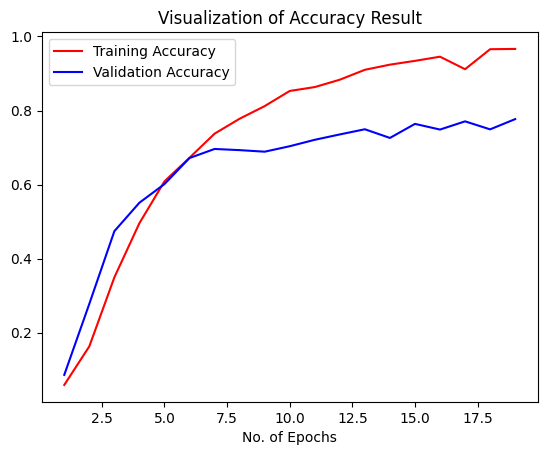

In [ ]:
#epochs = range(1, len(training_history.history['accuracy']) + 1)
epochs = [i for i in range(1,20)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### OTHER METRICS FOR EVALUATION


In [ ]:
class_name = valid_dataset.class_names
test_set= tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",  # Direct path to validation images
    labels="inferred",
    label_mode="categorical",
     color_mode="rgb",
    batch_size=1,
    image_size=(128,128),
    shuffle=False,  # No shuffling for validation set
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3795 files belonging to 37 classes.


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

3795/3795 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step


<tf.Tensor: shape=(3795,), dtype=int64, numpy=array([ 0,  2,  0, ..., 36, 36, 36])>

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(3795,), dtype=int64, numpy=array([ 0,  0,  0, ..., 36, 36, 36])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.71      0.71      0.71       126
                                 Apple___Black_rot       0.82      0.94      0.87       125
                          Apple___Cedar_apple_rust       0.86      0.65      0.74        55
                                   Apple___healthy       0.65      0.69      0.67       109
                               Blueberry___healthy       0.66      0.80      0.72       100
          Cherry_(including_sour)___Powdery_mildew       0.79      0.87      0.83       100
                 Cherry_(including_sour)___healthy       0.70      0.94      0.80       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.73      0.73      0.73       103
                       Corn_(maize)___Common_rust_       0.98      0.85      0.91       109
               Corn_(maize)___Northern_Leaf_Blight       0.79      0.77      0.

CONFUSION MATRIX


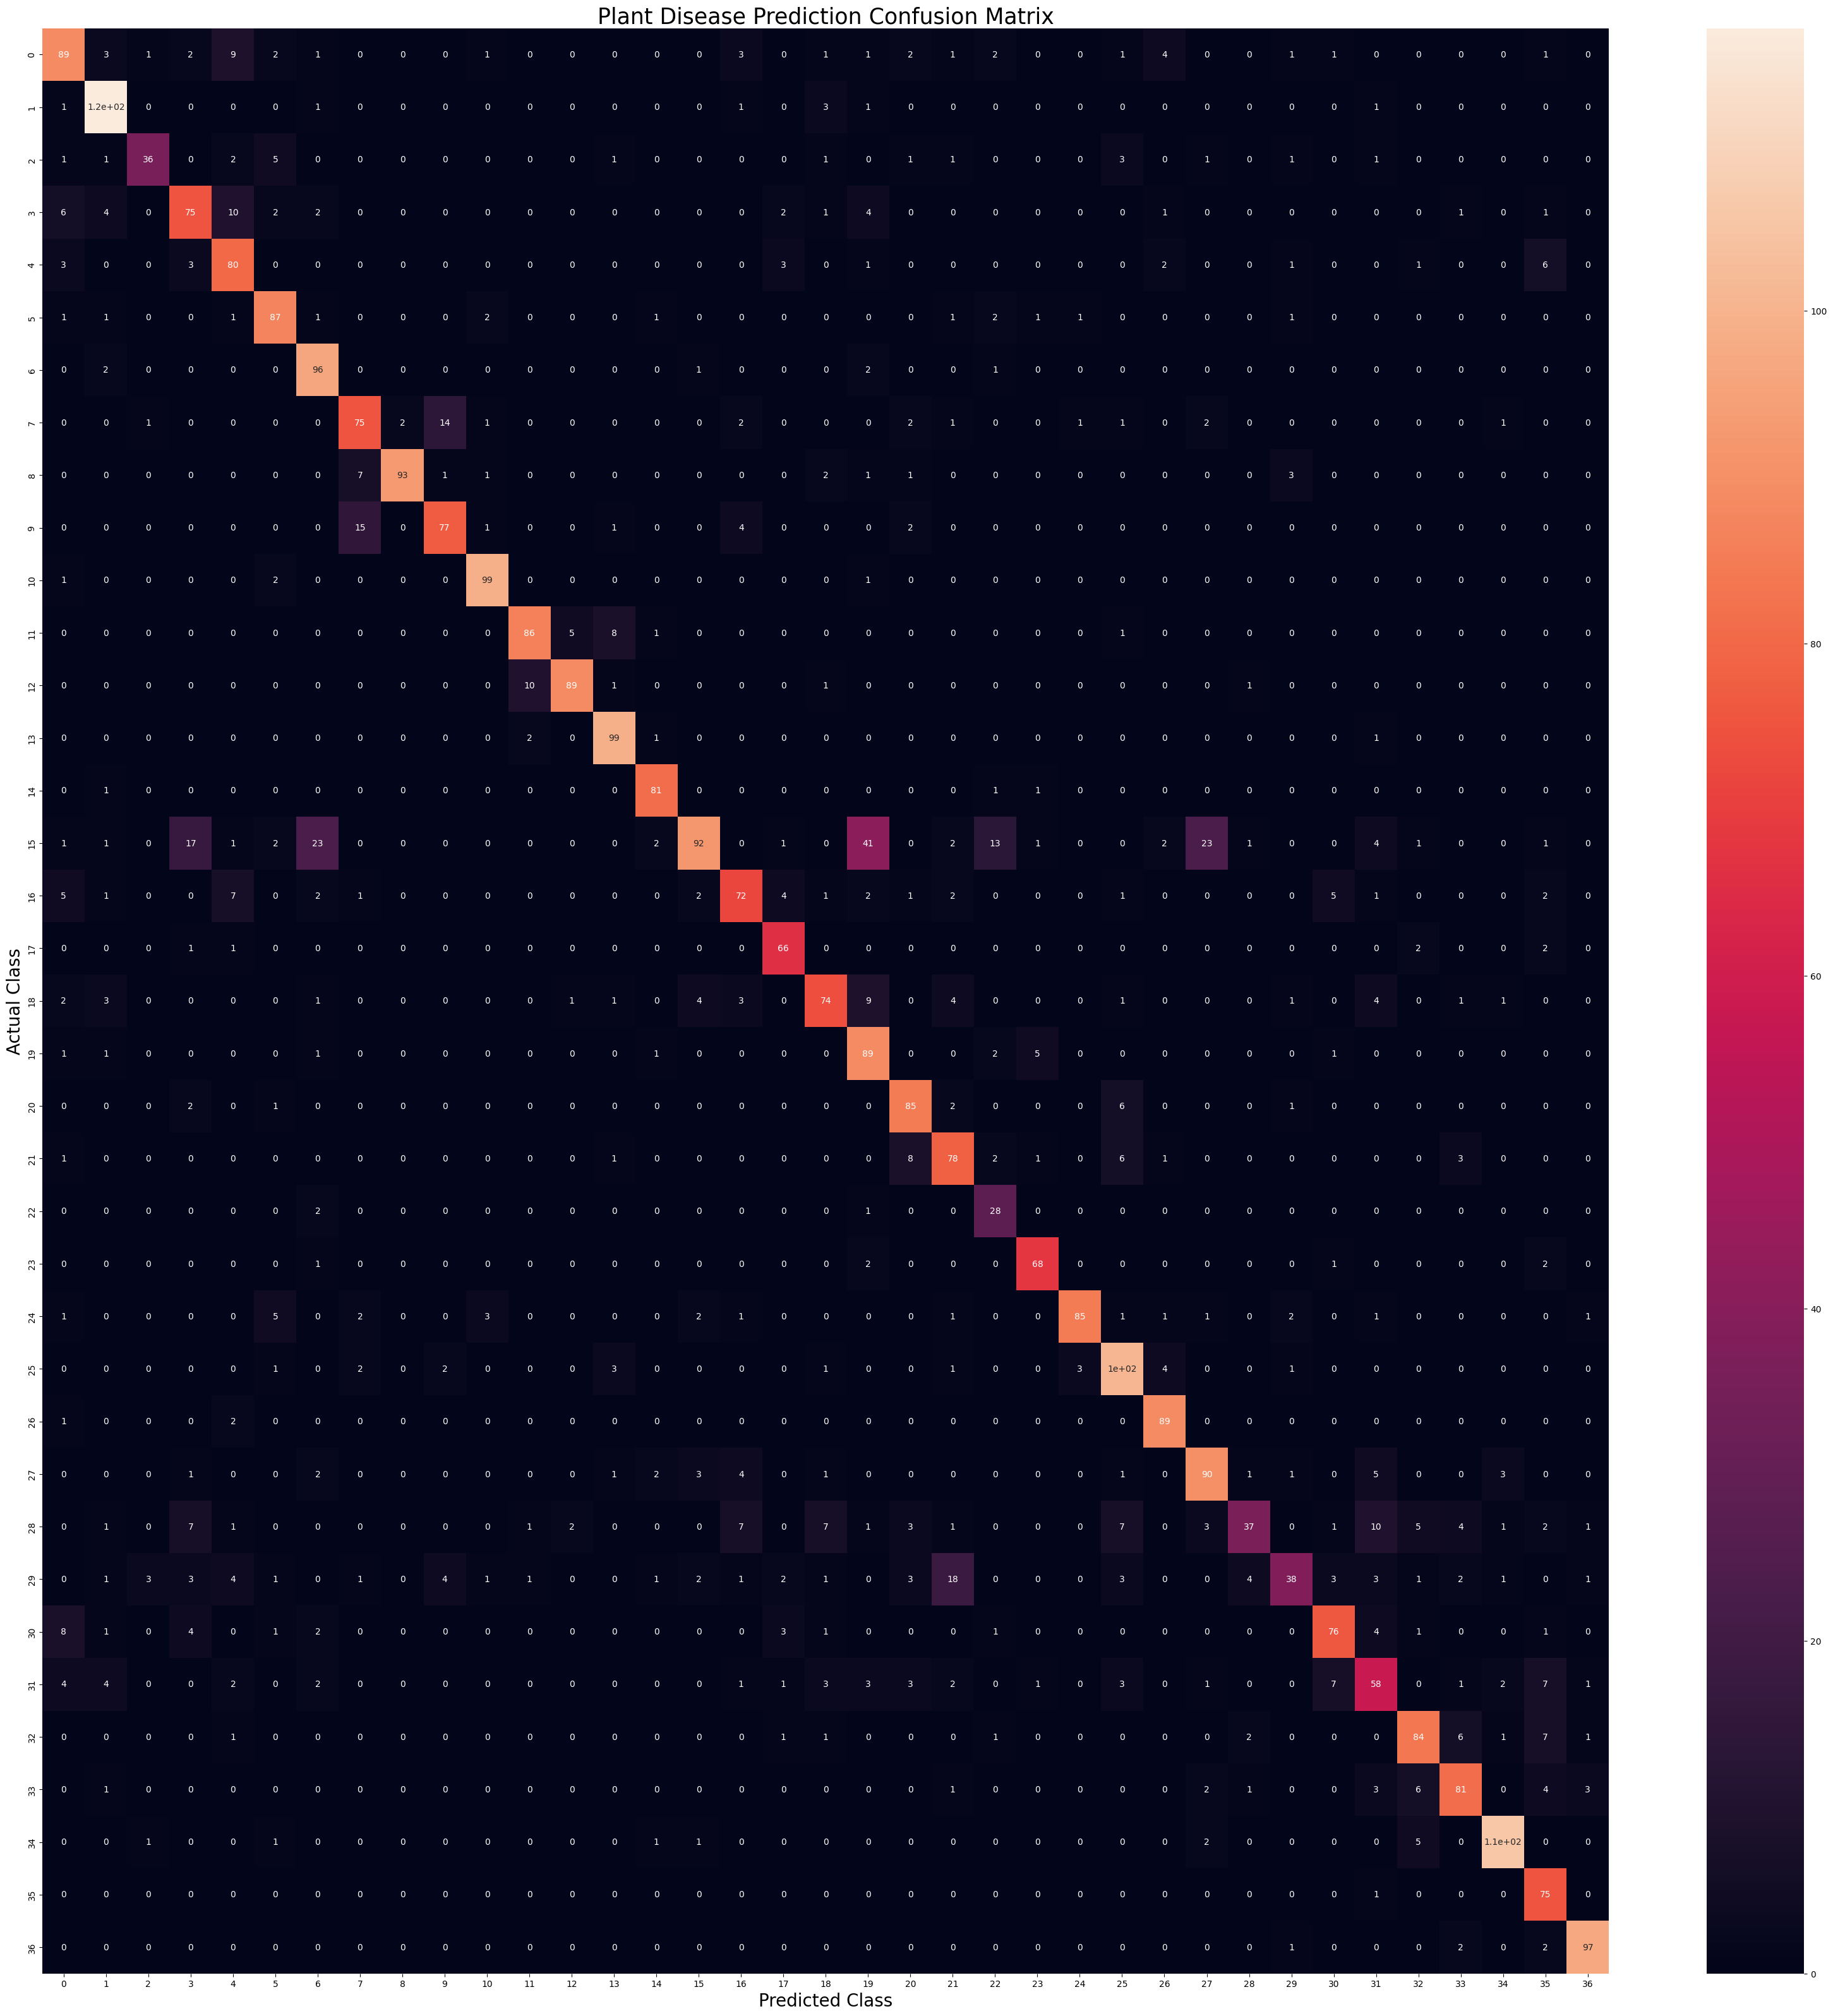

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

Num GPUs Available: 1
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 3813 files belonging to 37 classes.
Found 3795 files belonging to 37 classes.
Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_sco

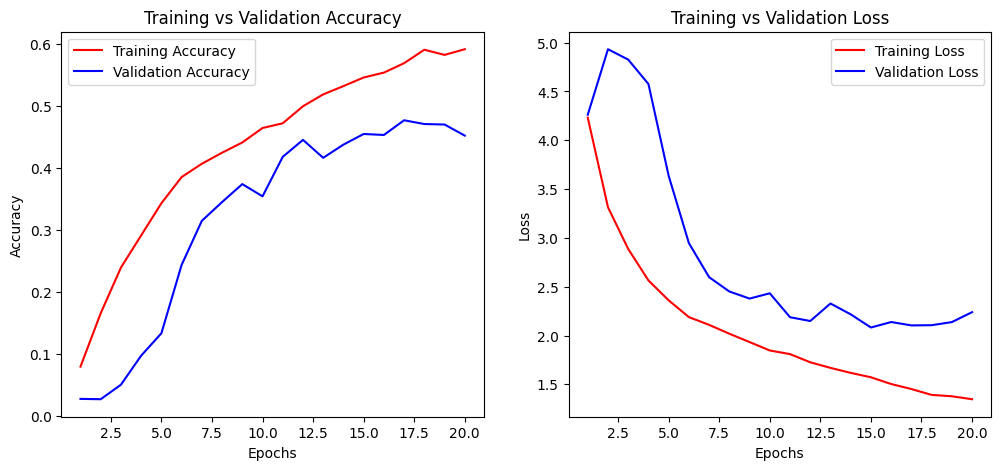

Found 3795 files belonging to 37 classes.
3795/3795 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       126
                                 Apple___Black_rot       0.00      0.00      0.00       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.00      0.00      0.00       109
                               Blueberry___healthy       0.03      0.94      0.06       100
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       100
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       109
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

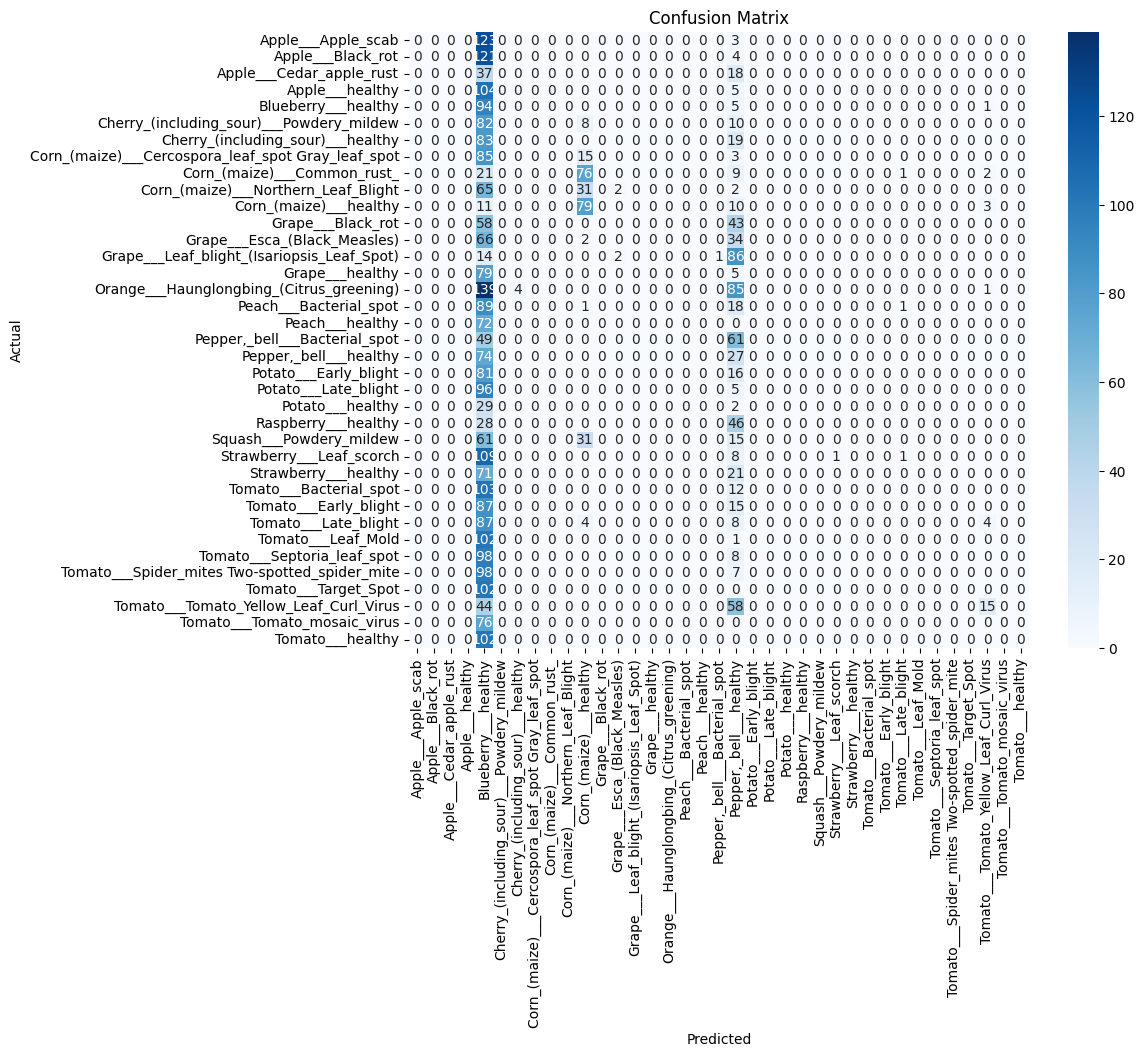

In [ ]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Enable GPU if available
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

# Mount Google Drive if using Colab
from google.colab import drive
drive.mount('/content/drive')

# ============================
# 🔹 DATA AUGMENTATION & NORMALIZATION
# ============================
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
])

# Normalize pixel values to [0,1] range
normalization_layer = Rescaling(1./255)

# ============================
# 🔹 LOAD DATASET
# ============================
batch_size = 32
img_size = (128, 128)

# Load training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True
)

# Load validation dataset
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=False  # No shuffling for validation set
)

# Extract class names
class_names = train_dataset.class_names
num_classes = len(class_names)
print("Class Names:", class_names)

# Apply data augmentation and normalization to datasets
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# ============================
# 🔹 CNN MODEL ARCHITECTURE
# ============================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')  # Output layer
])

# ============================
# 🔹 OPTIMIZATION TECHNIQUES
# ============================

# Learning rate scheduling
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, verbose=1, min_lr=1e-6
)

# Early stopping (stop training if no improvement)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True, verbose=1
)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ============================
# 🔹 TRAINING THE MODEL
# ============================
epochs = 30  # Change as needed

history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=epochs,
    callbacks=[early_stopping, lr_scheduler]
)

# ============================
# 🔹 EVALUATION & VISUALIZATION
# ============================

# Evaluate on Training Data
train_loss, train_acc = model.evaluate(train_dataset)
print(f'Training Accuracy: {train_acc:.4f}')

# Evaluate on Validation Data
val_loss, val_acc = model.evaluate(valid_dataset)
print(f'Validation Accuracy: {val_acc:.4f}')

# Save the trained model
model.save('plant_disease_model.keras')

# ============================
# 🔹 PLOT TRAINING RESULTS
# ============================
epochs_range = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], 'r', label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

# ============================
# 🔹 CONFUSION MATRIX & CLASSIFICATION REPORT
# ============================

# Load test dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=img_size,
    shuffle=False
)

# Make predictions
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = np.concatenate([np.argmax(y, axis=1) for x, y in test_dataset], axis=0)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
